In [5]:
from torch import nn as nn
import torchvision
from torch.autograd import Variable
from torchvision import datasets
from torchvision.transforms import transforms
from Loader import *
from Model import *
import seaborn as sns
sns.set()

In [6]:
my_device = ('cuda' if torch.cuda.is_available() else 'cpu')

EPOCH = 1
batch_size = 256
lr = 0.01

# Since the backbone is Resent, the input size should be 224
# And there is standardization
original_data = datasets.ImageFolder(root='./SFEW/',
                                     transform=transforms.Compose(
                                         [transforms.Resize(224),
                                          transforms.ToTensor(),
                                          transforms.Normalize([0.485, 0.456, 0.406],
                                                               [0.229, 0.224, 0.225])]))

face_data = datasets.ImageFolder(root='./Processed/',
                                 transform=transforms.Compose(
                                     [transforms.Resize(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])]))

# Stratified cross validation
original_cv = KCV(original_data, batch_size)
face_cv = KCV(face_data, batch_size)

criterion = torch.nn.CrossEntropyLoss()

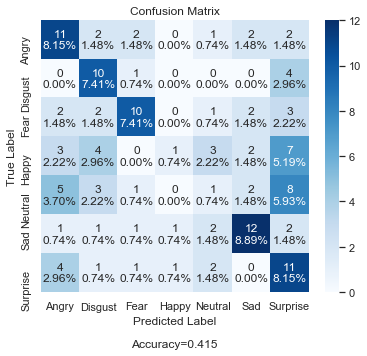

In [7]:
net = Net(my_device)
Path = 'original.pth'
net.load_state_dict(torch.load(Path, map_location=my_device))
net.eval()
i = original_cv[0]
eval_acc = 0
actual = []
prediction = []
for step, data in enumerate(i[1]):
        batch_x, batch_y = data
        batch_x, batch_y = Variable(batch_x.to(device=my_device)), Variable(batch_y.to(device=my_device))
        out = net(batch_x)
        pred = torch.max(out, 1)[1]
        actual.append(batch_y)
        prediction.append(pred)
        test_correct = (pred == batch_y).sum()
        eval_acc += float(test_correct.item())
actual = actual[0].tolist()
prediction = prediction[0].tolist()
cf = plot_confusion(135, 7, prediction, actual)
cf = np.array(cf)
make_confusion_matrix(cf, figsize=(6, 5), title='Confusion Matrix', categories=['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])

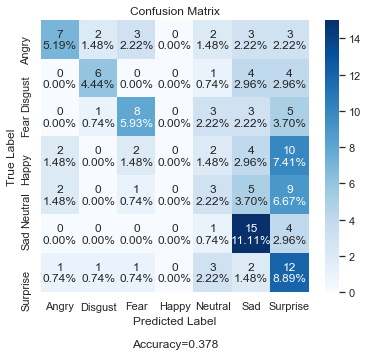

In [8]:
net = Net(my_device)
Path = 'face.pth'
net.load_state_dict(torch.load(Path, map_location=my_device))
net.eval()
i = face_cv[0]
eval_acc = 0
actual = []
prediction = []
for step, data in enumerate(i[1]):
        batch_x, batch_y = data
        batch_x, batch_y = Variable(batch_x.to(device=my_device)), Variable(batch_y.to(device=my_device))
        out = net(batch_x)
        pred = torch.max(out, 1)[1]
        actual.append(batch_y)
        prediction.append(pred)
        test_correct = (pred == batch_y).sum()
        eval_acc += float(test_correct.item())
actual = actual[0].tolist()
prediction = prediction[0].tolist()
cf = plot_confusion(135, 7, prediction, actual)
cf = np.array(cf)
make_confusion_matrix(cf, figsize=(6, 5), title='Confusion Matrix', categories=['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])